<a href="https://colab.research.google.com/github/jfdoppler/DNL-1c2020/blob/master/DNL_1C2020_Analisis_de_se%C3%B1ales_temporales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de señales temporales

**Reconstrucción del espacio de fases**








**Ejemplo 1: Oscilador lineal**

Para el oscilador lineal, con solución:

$x(t) = sin(\omega t)$

reconstruya el espacio de fases a partir de un embedding con retrasos temporales:

$y(n) = [ x(n), x(n+T)]$

Explore distintos valores de retraso temporal T. Compare el retraso temporal utilizado con un tiempo característico del problema.

 Compare con el espacio de fases original: $[x(t), \frac{dx}{dt}(t)]$. ¿Cómo se ve el embedding en la mínima dimensión (3) que indica el teorema de Takens?

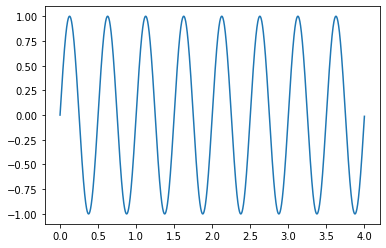

In [ ]:
#Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt

#Armamos la solucion y el tiempo
#Paso temporal
dt = 0.001
#Vector de tiempos
t = np.arange(0,4,dt)
#Frecuencia de oscilacion
f = 2
#Solucion
x = np.sin(2*np.pi * 2 * t)

#Armamos una figura para ver x vs t
plt.figure(1)
plt.plot(t, x)

El periodo del sistema es:0.5s
El retraso temporal utilizado es:0.125s
El retraso en número de puntos es: 125


Text(0, 0.5, '$x(n+T)$')

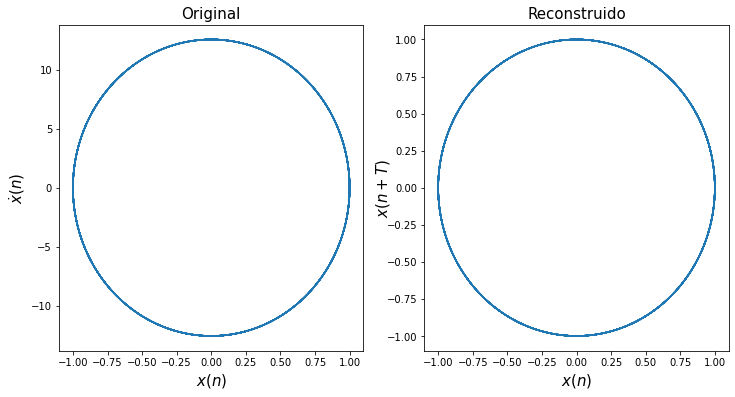

In [ ]:
#Armamos el espacio de fases original, derivamos x (analiticamente)
y = 2*np.pi * f * np.cos(2*np.pi *  f * t)

#Reconstruimos el espacio de fases
#Damos el paso temporal tau
tau = 0.25 * 0.5 #Un cuarto del periodo 
#En terminos de numero de puntos:
T = int(tau/dt)
print("El periodo del sistema es:"+str(1/f)+"s")
print("El retraso temporal utilizado es:"+str(tau)+"s")
print("El retraso en número de puntos es:", T)

#Hacemos el embedding de dimension 2:
#Definimos las listas donde guardamos la componente x e y del embedding
x_emb = []
y_emb = []

for k in range(len(x)-T):
  x_emb.append( x[k] )
  y_emb.append( x[k+T] )

#Graficamos para ver nuestra reconstrucción del espacio de fases y comparamos con el original
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.title("Original", fontsize=15)
plt.plot(x, y)
plt.xlabel(r"$x(n)$", fontsize=15)
plt.ylabel(r"$\dot{x}(n)$", fontsize=15)

plt.subplot(122)
plt.title("Reconstruido", fontsize=15)
plt.plot(x_emb, y_emb)
plt.xlabel(r"$x(n)$", fontsize=15)
plt.ylabel(r"$x(n+T)$", fontsize=15, labelpad=-5)

Ahora lo graficamos en tres dimensiones.

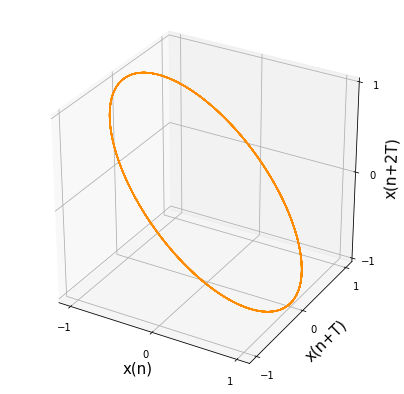

In [ ]:
#Armamos el embedding de dimension 3
x_emb_3 , y_emb_3, z_emb_3 = [], [], []

for k in range(len(x)-2*T):
  x_emb_3.append( x[k] )
  y_emb_3.append( x[k+T] )
  z_emb_3.append( x[k+2*T] )

#Lo graficamos
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection="3d")
ax.plot3D(x_emb_3, y_emb_3, z_emb_3, 'darkorange')
ax.set_xlabel('x(n)', fontsize=15)
ax.set_ylabel('x(n+T)', fontsize=15)
ax.set_zlabel('x(n+2T)', fontsize=15)
ax.set_xticks([-1,0,1])
ax.set_yticks([-1,0,1])
ax.set_zticks([-1,0,1])


**Ejercicio:** Arme una función que tenga como entradas la serie temporal, la dimensión del embedding y el retraso temporal. De salida: el embedding en la dimensión correspondiente.

**Ejemplo 2: Orbita de período 2**

Para una orbita de periodo 2, parametrizada por:

$x(t) = sin(\omega t) + \frac{3}{4} sin(\frac{\omega}{2}t)$

Realice un embedding de dimensión 2. Explore distintos valores de retraso temporal. Compare los retrasos temporales utilizados con escalas temporales del problema.

¿Es esta la dimensión correcta?

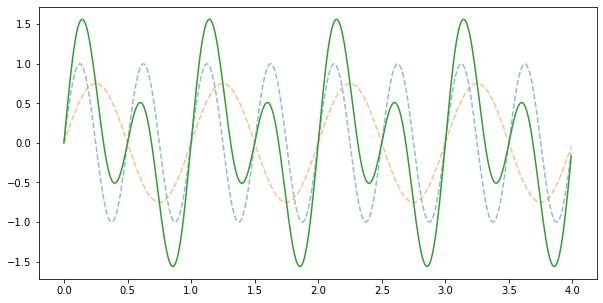

In [ ]:
#Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt

#Armamos el vector de tiempos y la señal temporal
dt = 0.01
tiempo = np.arange(0,4,dt)
#La frecuencia
f = 2
x = np.sin( 2*np.pi * f * tiempo ) + 0.75 * np.sin( 2 * np.pi * (f/2) * tiempo)
#Graficamos
plt.figure(figsize=(10,5))
plt.plot(tiempo, np.sin( 2*np.pi * f * tiempo ), '--', alpha=0.5)
plt.plot(tiempo, 0.75 * np.sin(  2 * np.pi * (f/2) * tiempo ), '--', alpha=0.5)

plt.plot(tiempo, x)

La escala mas rapida es:0.5s
El retraso en numero de puntos es: 12


Text(0, 0.5, '$x(n+T)$')

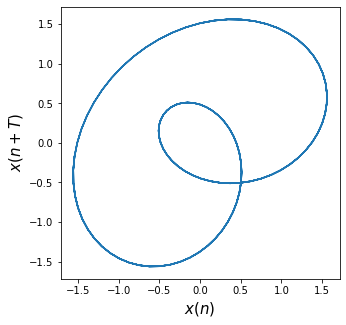

In [ ]:
#Armamos un embedding de dimension 2

#Defino la frecuencia de sampleo
fs = 1/dt
Ejercicio:
#Defino la escala temporal mas rapida
t_mas_rapida = 1/f
print("La escala mas rapida es:"+str(t_mas_rapida)+"s")

#Defino el retraso como un cuarto de la escala temporal mas rapida
T = int(0.25 * t_mas_rapida * fs)
print("El retraso en numero de puntos es:", T)
#Armamos el embedding
x_emb_2, y_emb_2 = [], []
for k in range(len(x)-T):
  x_emb_2.append(x[k])
  y_emb_2.append(x[k+T])

#Lo graficamos
plt.figure(figsize=(5,5))
plt.plot(x_emb_2, y_emb_2)
plt.xlabel(r"$x(n)$", fontsize=15)
plt.ylabel(r"$x(n+T)$", fontsize=15)

**Ejercicio:** Haga un embedding en dimensión 3.

# Segunda parte

**Ejemplo 3: Rossler**

Para el atractor de Rossler:

$\frac{dx}{dt}=-y-z$

$\frac{dy}{dt}=x+ay$

$\frac{dz}{dt}=b+z(x-c)$

Con $a=0.1 ; b=0.1; c=14$. 

**(a)**Integre el sistema. Observe $x(t)$, $y(t)$, $z(t)$. Grafique la trayectoria en el espacio de fases.



Text(0.5, 0, 'Tiempo')

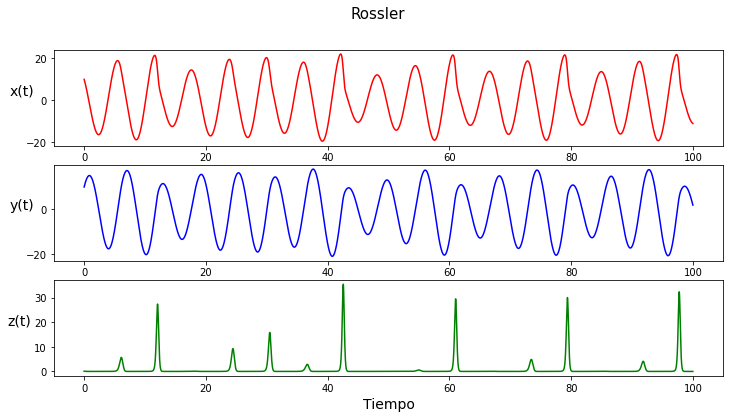

In [ ]:
#Importamos las librerias
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

#Definimos variables globales (se meten dentro de las funciones)
global a 
global b
global c
a, b, c = 0.1,0.1,14

#Definimos el campo vector del rossler
def rossler(v, t):
  x,y,z = v[0],v[1],v[2]
  
  dxdt = - y - z
  dydt = x + a * y
  dzdt = b + z * (x - c)

  return [dxdt, dydt, dzdt]
#Damos un paso temporal en el que queremos la solución
dt = 0.01
#Definimos el vector de tiempos
tiempo = np.arange(0,100,dt)
#Damos una condición inicial
v0 = [10,10,0.1]
#Integramos con odeint
sol = odeint(rossler,v0,tiempo)
#Recuperamos x(t), y(t), z(t)
x, y, z = sol[:,0], sol[:,1], sol[:,2]

#Armamos la figura 1
plt.figure(figsize=(12,6))
plt.suptitle("Rossler", fontsize=15)

plt.subplot(311)
plt.plot(tiempo, x, 'r')
plt.ylabel("x(t)", fontsize=14, rotation=0)
plt.subplot(312)
plt.plot(tiempo, y, 'b')
plt.ylabel("y(t)", fontsize=14, rotation=0)
plt.subplot(313)
plt.plot(tiempo, z, 'g')
plt.ylabel("z(t)", fontsize=14, rotation=0, labelpad=15)
plt.xlabel("Tiempo", fontsize=14)


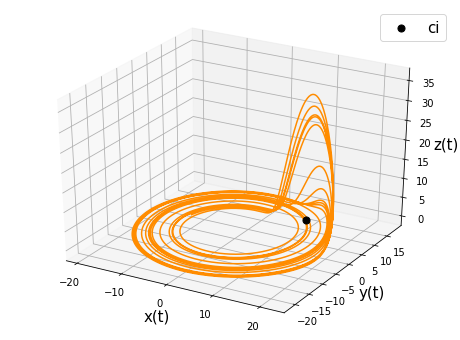

In [ ]:
#Graficamos la trayectoria en el espacio de fases
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection="3d")
ax.plot3D(x, y, z, 'darkorange')
ax.scatter(v0[0], v0[1], v0[2], s=50, color='k', label="ci")
ax.set_xlabel('x(t)', fontsize=15)
ax.set_ylabel('y(t)', fontsize=15)
ax.set_zlabel('z(t)', fontsize=15)
ax.legend(fontsize=15)

**(b)** Arme un embedding de dimensión 3 para el atractor de Rossler. ¿Qué variable conviene usar? 

¿Qué pasa si combina dos de las tres variables? Por ejemplo:

$[x(n), x(n+T), y(n)]$

Text(0.5, 0, 'x(n+2T)')

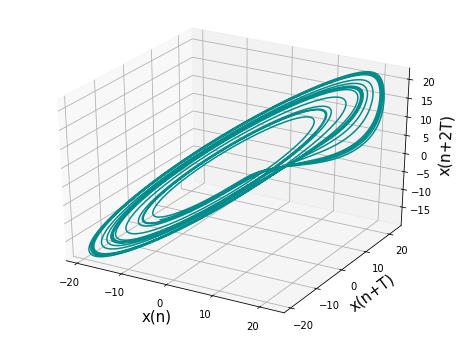

In [ ]:
#Armamos un embedding con x
T = 25
x_3, y_3, z_3 = [], [], []

for k in range(len(x)-2*T):
  x_3.append(x[k])
  y_3.append(x[k+T])
  z_3.append(x[k+2*T])

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection="3d")
ax.plot3D(x_3, y_3, z_3, 'darkcyan')
ax.set_xlabel('x(n)', fontsize=15)
ax.set_ylabel('x(n+T)', fontsize=15)
ax.set_zlabel('x(n+2T)', fontsize=15)

**Ejercicio:** Para el atractor de Rossler:

**(a)** Busque numéricamente una aproximación a la orbita de período 1 y alguna órbita de período 2.

*Ayuda: defina una sección de Poincarè (por ejemplo: x=0, y<0). Integre un tiempo largo. Defina la orbita de periodo 1 como aquella para la cual puntos consecutivos tienen la minima distancia.*

**(b)** Explore qué sucede con estas orbitas al realizar un embedding en x. ¿Las orbitas siguen enroscadas?

*Ayuda: Arme el embedding y repita lo realizado en (a).*


Hacemos el **(a)**. Les queda hacer **(b)** y ver si obtienen lo mismo para la reconstrucción!

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits import mplot3d

global a 
global b
global c
a, b, c = 0.1,0.1,14

def rossler(v, t):
  x,y,z = v[0],v[1],v[2]
  
  dxdt = - y - z
  dydt = x + a * y
  dzdt = b + z * (x - c)

  return [dxdt, dydt, dzdt]

dt = 0.01
tiempo = np.arange(0,5000,dt)
v0 = [10,10,0.1]
sol = odeint(rossler,v0,tiempo)
x, y, z = sol[:,0], sol[:,1], sol[:,2]

Para buscar orbitas periodicas, armamos una sección de Poincarè. Una posible es x=0 ; y<0. Para buscar los ceros de x(t), hacemos un spline cúbico y le buscamos las raíces.

Text(0, 0.5, 'x')

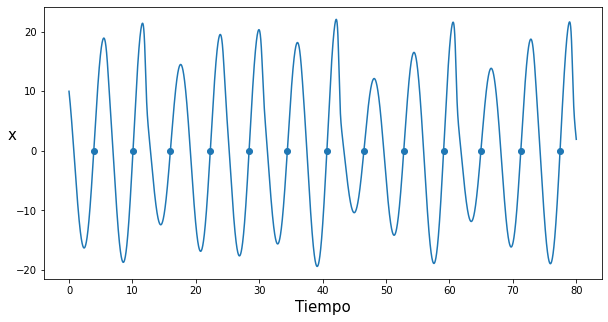

In [ ]:
#Hacemos una interpolacion
from scipy.interpolate import UnivariateSpline
spl = UnivariateSpline(tiempo, x,s=0,k=3)
#Busco los ceros del spline; Los tiempos en que x=0
t_spl_zeros=spl.roots()
#Hacemos spline en y
sply = UnivariateSpline(tiempo, y,s=0,k=3)
#Y el spline en z
splz = UnivariateSpline(tiempo, z,s=0,k=3)

#Para agarrar cuando y<0. Me quedo con los pares 
t_spl_zeros = t_spl_zeros[1:len(t_spl_zeros):2]
t_spl = np.linspace(tiempo[0], tiempo[-1], len(x)*10)

#Graficamos el spline
plt.figure(figsize=(10,5))
plt.plot(t_spl[0:int(80*10/dt)], spl(t_spl[0:int(80*10/dt)]))
plt.scatter(t_spl_zeros[0:13], spl(t_spl_zeros[0:13]))
plt.xlabel("Tiempo", fontsize=15)
plt.ylabel("x", fontsize=15, rotation = 0)

Y si lo miramos en el espacio de fases se ve más claro qué hicimos.

Text(0.5, 0, 'z')

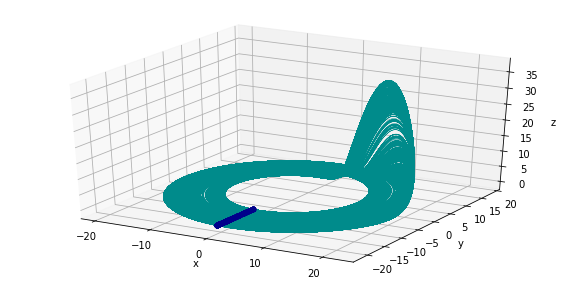

In [ ]:
#%% Miramos los puntos de la sección en 3D
fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection="3d")
ax.plot3D(spl(t_spl), sply(t_spl), splz(t_spl), 'darkcyan', lw=0.5)
ax.scatter(spl(t_spl_zeros), sply(t_spl_zeros), splz(t_spl_zeros), color='darkblue')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Ahora que tenemos los puntos (y, z) sobre la sección, armamos el mapa.

Text(0, 0.5, '$z_{n+1}$')

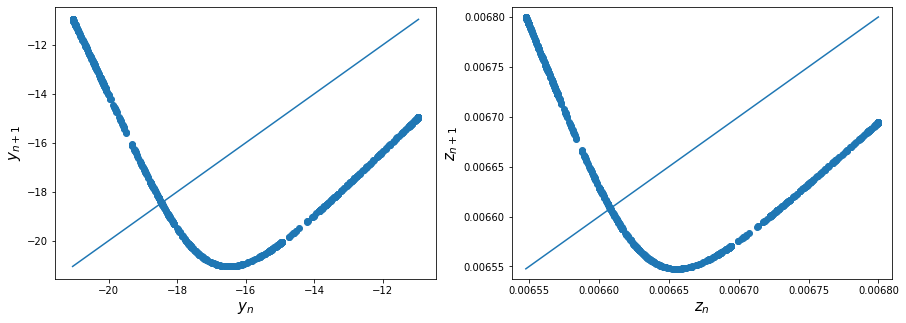

In [ ]:
#%% Miramos el mapa
#Vector y
yn = []
#Valor de y en la vuelta siguiente
yn1 = []
for k in range(len(sply(t_spl_zeros))-1):
    #Para cada punto que cruza la sección, guardamos el valor de y:
    yn.append(sply(t_spl_zeros)[k])
    #y el valor de y en el siguiente cruce
    yn1.append(sply(t_spl_zeros)[k+1])
#Hacemos lo mismo con z
zn = []
zn1 = []
for k in range(len(sply(t_spl_zeros))-1):
    zn.append(splz(t_spl_zeros)[k])
    zn1.append(splz(t_spl_zeros)[k+1])

#Lo graficamos
plt.figure(figsize=(15,5))
plt.subplot(121)
yy = np.linspace(min(yn), max(yn), 1000)
plt.scatter(yn, yn1)
plt.plot(yy, yy)
plt.xlabel(r"$y_{n}$", fontsize=15)
plt.ylabel(r"$y_{n+1}$", fontsize=15)

plt.subplot(122)
zz = np.linspace(min(zn), max(zn), 1000)
plt.scatter(zn, zn1)
plt.xlim([min(zn)-0.00001, max(zn)+0.00001])
plt.ylim([min(zn)-0.00001, max(zn)+0.00001])
plt.plot(zz, zz)
plt.xlabel(r"$z_{n}$", fontsize=15)
plt.ylabel(r"$z_{n+1}$", fontsize=15)

Ahora que tenemos el mapa buscamos la orbita de período 1: será nuestro punto (yn, yn+1) y (zn, zn+1) que más cerca esté de la recta yn=yn+1!

El indice de la de periodo 1 y: 96
El indice de la de periodo 1 z: 96


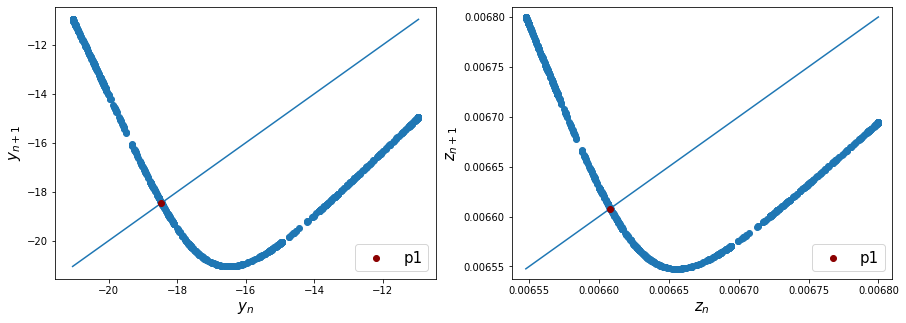

In [ ]:
y_p1 , z_p1 = [], []
minimo_y = 1000
minimo_z = 1000
for k in range(len(yn)):
    if np.abs(yn1[k]-yn[k])<minimo_y:
        yp1 = yn[k]
        indice_y = k
        minimo_y = np.abs(yn1[k]-yn[k])
print("El indice de la de periodo 1 y:", indice_y)
for k in range(len(zn)):
    if np.abs(zn1[k]-zn[k])<minimo_z:
        zp1 = zn[k]
        indice_z = k
        minimo_z = np.abs(zn1[k]-zn[k])
print("El indice de la de periodo 1 z:", indice_z)

y_p1.append(yn[indice_y])
z_p1.append(zn[indice_z])
#Defino el tiempo de la orbita
t_p1 = np.arange(t_spl_zeros[indice_y], t_spl_zeros[indice_y+1], dt)


#Lo graficamos
plt.figure(figsize=(15,5))
plt.subplot(121)
yy = np.linspace(min(yn), max(yn), 1000)
plt.scatter(yn, yn1)
plt.scatter(yp1, yp1, color='darkred', zorder=3, label='p1')
plt.plot(yy, yy)
plt.xlabel(r"$y_{n}$", fontsize=15)
plt.ylabel(r"$y_{n+1}$", fontsize=15)
plt.legend(fontsize=15)
plt.subplot(122)
zz = np.linspace(min(zn), max(zn), 1000)
plt.scatter(zn, zn1)
plt.scatter(zp1, zp1, color='darkred', zorder=3, label='p1')

plt.xlim([min(zn)-0.00001, max(zn)+0.00001])
plt.ylim([min(zn)-0.00001, max(zn)+0.00001])
plt.plot(zz, zz)
plt.xlabel(r"$z_{n}$", fontsize=15)
plt.ylabel(r"$z_{n+1}$", fontsize=15)
plt.legend(fontsize=15)


Y en el espacio de fases se ve así:

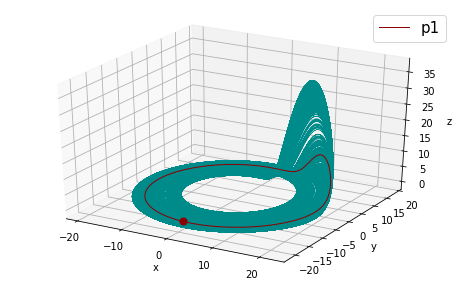

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes(projection="3d")
ax.plot3D(spl(t_spl), sply(t_spl), splz(t_spl), 'darkcyan', lw=0.5)
ax.plot3D(spl(t_p1), sply(t_p1), splz(t_p1), 'darkred', lw=1, label="p1")
ax.scatter(spl(t_p1[0]), sply(t_p1[0]), splz(t_p1[0]), color='darkred', s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(fontsize=15)

Ahora para buscar las orbitas de periodo 2, armamos el mapa (yn, yn+2) y (zn, zn+2).

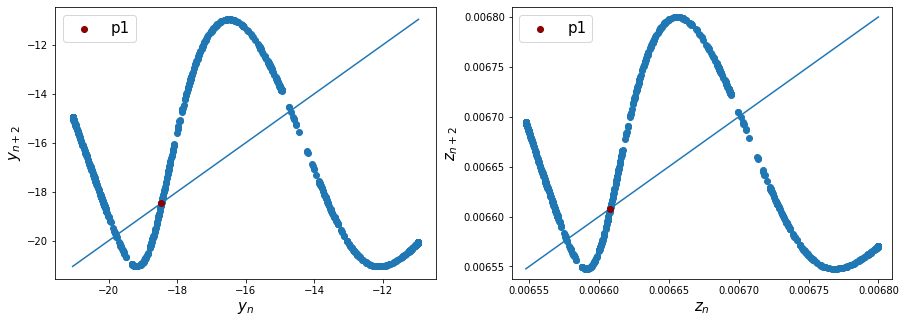

In [ ]:
#Armamos el mapa al dar dos vueltas
yn = []
yn2 = []
for k in range(len(sply(t_spl_zeros))-2):
    yn.append(sply(t_spl_zeros)[k])
    yn2.append(sply(t_spl_zeros)[k+2])

zn = []
zn2 = []
for k in range(len(splz(t_spl_zeros))-2):
    zn.append(splz(t_spl_zeros)[k])
    zn2.append(splz(t_spl_zeros)[k+2])


zz = np.linspace(min(zn), max(zn), 1000)

plt.figure(figsize=(15,5))
plt.subplot(121)
yy = np.linspace(min(yn), max(yn), 1000)
plt.scatter(y_p1, y_p1, color='darkred', label="p1", zorder=3)
plt.scatter(yn, yn2)
plt.plot(yy, yy)
plt.xlabel(r"$y_{n}$", fontsize=15)
plt.ylabel(r"$y_{n+2}$", fontsize=15)
plt.legend(fontsize=15)

plt.subplot(122)
plt.scatter(zn, zn2)
plt.scatter(z_p1, z_p1, color='darkred', label="p1", zorder=3)
plt.plot(zz, zz)
plt.xlim([min(zn)-0.00001, max(zn)+0.00001])
plt.ylim([min(zn)-0.00001, max(zn)+0.00001])
plt.xlabel(r"$z_{n}$", fontsize=15)
plt.ylabel(r"$z_{n+2}$", fontsize=15)
plt.legend(fontsize=15)

Buscamos una de periodo 2

El indice de periodo 2_1 en y es: 681
El indice de periodo 2_1 en z es: 681
El indice de periodo 2_2 en y es: 682
El indice de periodo 2_2 en z es: 682


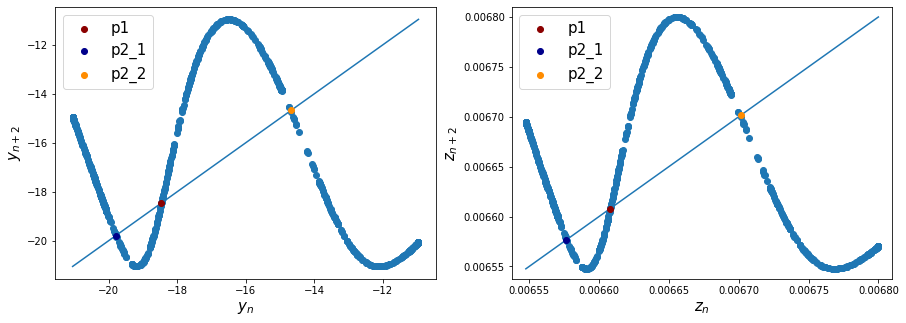

In [ ]:
minimo_y = 1000
y_p2_1 = []
z_p2_1 = []
for k in range(len(yn)):
    if yn[k]<-19:            
        if np.abs(yn2[k]-yn[k])<minimo_y:
            yp2 = yn[k]
            indice_y = k
            minimo_y = np.abs(yn2[k]-yn[k])
print("El indice de periodo 2_1 en y es:", indice_y)
y_p2_1.append(yp2)

minimo_z = 1000
for k in range(len(zn)):
    if zn[k]<0.0066:            
        if np.abs(zn2[k]-zn[k])<minimo_z:
            zp2 = zn[k]
            indice_z = k
            minimo_z = np.abs(zn2[k]-zn[k])
print("El indice de periodo 2_1 en z es:", indice_z)
z_p2_1.append(zp2)
t_p2_1 = np.arange(t_spl_zeros[indice_y], t_spl_zeros[indice_y+2], dt)

#Ahora la otra
minimo_y = 1000
y_p2_2 = []
z_p2_2 = []
for k in range(len(yn)):
    if yn[k]>-16:            
        if np.abs(yn2[k]-yn[k])<minimo_y:
            yp2 = yn[k]
            indice_y = k
            minimo_y = np.abs(yn2[k]-yn[k])
print("El indice de periodo 2_2 en y es:", indice_y)
y_p2_2.append(yp2)

minimo_z = 1000
for k in range(len(zn)):
    if zn[k]>0.00665:            
        if np.abs(zn2[k]-zn[k])<minimo_z:
            zp2 = zn[k]
            indice_z = k
            minimo_z = np.abs(zn2[k]-zn[k])
print("El indice de periodo 2_2 en z es:", indice_z)
t_p2_2 = np.arange(t_spl_zeros[indice_y], t_spl_zeros[indice_y+2], dt)
z_p2_2.append(zp2)

#Lo graficamos
plt.figure(figsize=(15,5))
plt.subplot(121)
yy = np.linspace(min(yn), max(yn), 1000)
plt.scatter(y_p1, y_p1, color='darkred', label="p1", zorder=3)
plt.scatter(y_p2_1, y_p2_1, color='darkblue', label="p2_1", zorder=3)
plt.scatter(y_p2_2, y_p2_2, color='darkorange', label="p2_2", zorder=3)

plt.scatter(yn, yn2)
plt.plot(yy, yy)
plt.xlabel(r"$y_{n}$", fontsize=15)
plt.ylabel(r"$y_{n+2}$", fontsize=15)
plt.legend(fontsize=15)

plt.subplot(122)
plt.scatter(zn, zn2)
plt.scatter(z_p1, z_p1, color='darkred', label="p1", zorder=3)
plt.scatter(z_p2_1, z_p2_1, color='darkblue', label="p2_1", zorder=3)
plt.scatter(z_p2_2, z_p2_2, color='darkorange', label="p2_2", zorder=3)

plt.plot(zz, zz)
plt.xlim([min(zn)-0.00001, max(zn)+0.00001])
plt.ylim([min(zn)-0.00001, max(zn)+0.00001])
plt.xlabel(r"$z_{n}$", fontsize=15)
plt.ylabel(r"$z_{n+2}$", fontsize=15)
plt.legend(fontsize=15)

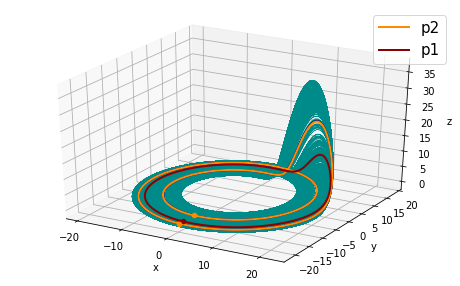

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes(projection="3d")
ax.plot3D(spl(t_spl), sply(t_spl), splz(t_spl), 'darkcyan', lw=0.5)
ax.plot3D(spl(t_p2_1), sply(t_p2_1), splz(t_p2_1), 'darkblue', lw=2)
ax.plot3D(spl(t_p2_2), sply(t_p2_2), splz(t_p2_2), 'darkorange', lw=2, label="p2")
ax.plot3D(spl(t_p1), sply(t_p1), splz(t_p1), 'darkred', lw=2, label="p1")


# ax.scatter(spl(t_spl_zeros), sply(t_spl_zeros), splz(t_spl_zeros), color='darkblue')
ax.scatter(spl(t_p1[0]), sply(t_p1[0]), splz(t_p1[0]), color='darkred')
ax.scatter(spl(t_p2_1[0]), sply(t_p2_1[0]), splz(t_p2_1[0]), color='darkorange')
ax.scatter(spl(t_p2_2[0]), sply(t_p2_2[0]), splz(t_p2_1[-1]), color='darkorange')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(fontsize=15)

La de periodo 2 que encontramos es la misma orbita! Si empezamos en alguno de los puntos naranjas, dos iteradas después volvemos al lugar de inicio.

Si graficamos las orbitas periódicas en el plano (x,y):

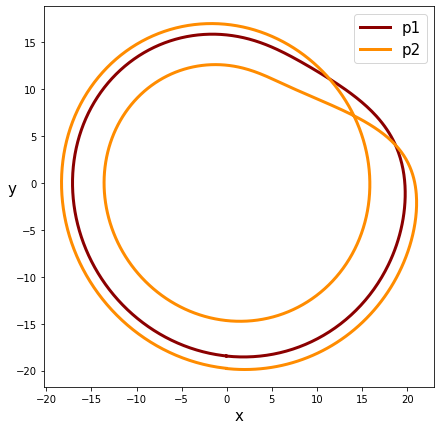

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(spl(t_p1), sply(t_p1), 'darkred', lw=3, label="p1")
plt.plot(spl(t_p2_1), sply(t_p2_1), 'darkorange', lw=3, label="p2")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15, rotation=0)
plt.legend(fontsize=15)